In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [23]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8466_авито,1,авито,15.659230,6320000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,переуступка,NaN,ЖК «Ботаника LIFE»,NaN,другое,Сдан 4 кв. 2023,NaN
13332,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13333,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13334,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df[df['Мусор'] == 0]
df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7886,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7887,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7888,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['LN(Цена_кв.м)'] = np.log(df['Цена(кв.м)'])

In [26]:
df[['Этаж_1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Этаж_1  7890 non-null   int64
dtypes: int64(1)
memory usage: 61.8 KB


In [27]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Анализ',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп.1',
 'Комм.1',
 'Выбросы_2',
 'Исп.2',
 'Комм.2',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.3',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка

Функции бининга могут быть применены к любым числовым данным. Перед тем, как делать бининг необходимо подумать, какие категории целесообразно заранее исключить, например, делая бининг этажа расположения лучше исключить первые и последние этажи, в части элитного жилья лучше посмотреть отдельно визуализацию и принять решение.

Обращаю внимание, что функции ниже необходимо применять совместно с визуальным анализом и принимать решение по бинам в комплексе методов бининга. DecisionTreeRegressor создает бины анализируя зависимость цены и фактора, по которому проводится бининг. KBinsDiscretizer отталкивается исключительно только от фактора. В этой связи предпочтительнее использовать DecisionTreeRegressor.

# Функции

In [30]:
df_1 = df[df['Этаж_2'] == 'средний']
#df_1 = df_1[df_1['ЖК_БД'] == 'нет']
len(df_1)

6200

# DecisionTreeRegressor

In [1]:
def bining_dt(data, x, y, max_depth = 2, min_samples_leaf = 10, min_samples_split = 10, max_features = None, rotation = 0):
    '''
    x - фактор, который мы разбиваем на бины. Например, 'Этаж_1'.
    y - таргет, на который ориентируемся при разбиении x на бины (цена за 1 кв.м). Например, 'LN(Цена_кв.м)'.
    max_depth - глубина дерева (чем глубже дерево, тем больше бинов).
    min_samples_leaf - минимальный объем выборки, который должен быть в каждом листе после разбиения.
    min_samples_split - минимальный объем выборки, который должен быть в узле, чтобы этот узел мог быть разделен на 2.
    max_features - максимальное количество факторов, по которым ищется лучшее разбиение в дереве (при большом количестве факторов дорого искать лучшее решение). 
                   В нашем случае используются только 1 фактор, поэтому устанавливаем None (все факторы).
    rotation - поворот значений по оси Х (по умолчанию 0).
    '''
    df_bins = data.copy()
    
    DT = DecisionTreeRegressor(max_depth = max_depth,                                                                       # глубина дерева, см. описание выше
                               min_samples_leaf = min_samples_leaf,                                                         # см. описание выше
                               min_samples_split = min_samples_split,                                                       # см. описание выше
                               max_features = max_features,                                                                 # см. описание выше
                               random_state = 42                                                                            # см. описание выше
                              ) 
    DT.fit(df_bins[[x]], df_bins[y])                                                                                        # обучаем модель DT
 
    thresholds = []                                                                                                         # список границ бинов
    for i in range(DT.tree_.node_count):                                                                                    # перебираем все узлы в дереве
        if DT.tree_.children_left[i] != -1:                                                                                 # только узлы, где происходит разбиение (-1 в узле нет разбиения)
            thresholds.append(int(DT.tree_.threshold[i] + 0.5))                                                             # вытаскиваем пороги разбиения с учетом округления
    
    thresholds = [j for j in thresholds if j != 0]                                                                          # если 0 есть в thresholds, удаляем его

    thresholds.sort()                                                                                                       # сортируем границы от мин до макс
    thresholds_list = [df_bins[x].min()] + list(thresholds) + [df_bins[x].max() + 1]                                        # список границ бинов
    thresholds_list = list(set(thresholds_list))                                                                            # удаляются дубликаты при их наличии
    thresholds_list.sort()

    bins = pd.cut(df_bins[x], bins = thresholds_list, right = False, include_lowest = True)                                 # делим фактор на бины
    
    df_bins['bins'] = bins
    variance_in_bins = np.sqrt(df_bins.groupby('bins')[y].var())                                                            # разброс внутри бина
    average_variance_in_bins = np.sqrt(df_bins.groupby('bins')[y].var()).mean()                                             # средний разброс по всем бинам
        
    plt.figure(figsize = (16, 10))
    
    plt.subplot(2, 2, 1)                                                                                                    # строка, столбец, индекс
    sns.boxplot(
                x = 'bins', 
                y = y, 
                data = df_bins,
                #color = 'grey',
                #ax = ax[1]
                )
    plt.xticks(rotation = rotation)

    plt.subplot(2, 2, 2)
    sns.lineplot(
                 df_bins.groupby(x)[y].median()       
                 #x = 'bins', 
                 #y = y, 
                 #data = data,
                 #color = 'grey',
                 #ax = ax[1]
                 )
    sns.lineplot(
                 df_bins.groupby(x)[y].mean()       
                 #x = 'bins', 
                 #y = y, 
                 #data = data,
                 #color = 'grey',
                 #ax = ax[1]
                 )
    
    plt.subplot(2, 1, 2)
    plot_tree(DT, feature_names = [x], filled = True, rounded = True)
    
    plt.show()
    
    return bins, variance_in_bins, average_variance_in_bins

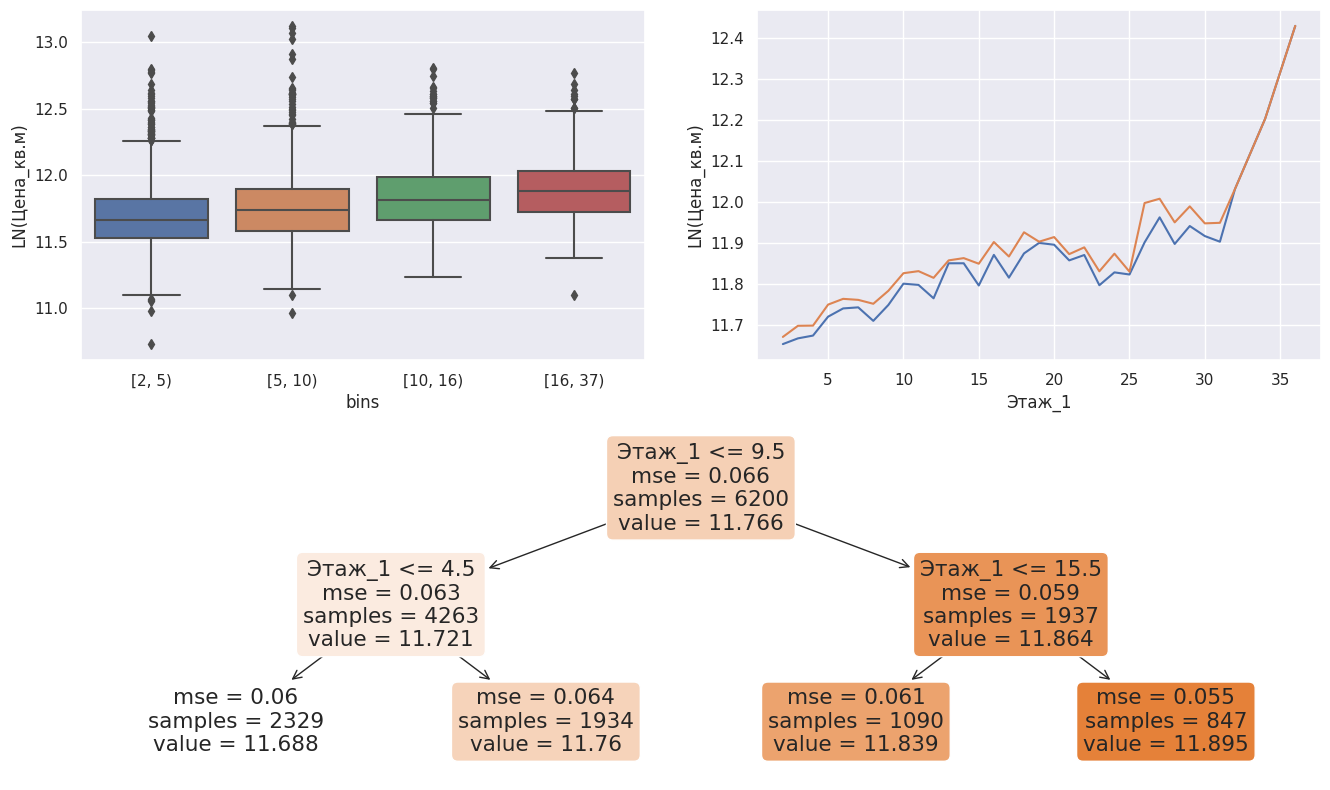

In [62]:
bins, variance_in_bins, average_variance_in_bins = bining_dt(data = df_1, 
                                                             x = 'Этаж_1', 
                                                             y = 'LN(Цена_кв.м)'
                                                            )

In [63]:
variance_in_bins

bins
[2, 5)      0.245370
[5, 10)     0.253492
[10, 16)    0.246425
[16, 37)    0.235468
Name: LN(Цена_кв.м), dtype: float64

In [64]:
average_variance_in_bins

0.2451889435238859

# KBinsDiscretizer (kmeans)

In [65]:
def bining_kbd(data, x, y, n_bins = 5, strategy = 'kmeans', encode = 'ordinal'):
    '''
    x - фактор, который мы разбиваем на бины. Например, 'Этаж_1'.
    y - таргет, на который ориентируемся при разбиении x на бины (цена за 1 кв.м). Например, 'LN(Цена_кв.м)'.
    n_bins - количество бинов (= 5).
    strategy - стратегия бининга (= kmeans).
    encode - преобразователь в число (так как бин является категорией), ordinal = labelencoder.
    '''
    df_bins = data.copy()
    
    discretizer = KBinsDiscretizer(n_bins = n_bins,                                                                         # количество бинов
                                   strategy = strategy,                                                                     # стратегия бининга
                                   encode = encode)                                                                         # преобразование бининга
    
    #df['Этаж_бины'] = discretizer.fit_transform(df[['Этаж']])                                                              
    bin_enc = discretizer.fit_transform(df_bins[[x]])                                                                       # обучаем модель
    
    bin_edges = discretizer.bin_edges_[0]                                                                                   # границы бининга
    
    thresholds = []                                                                                                         # список границ бинов
    for i in range(len(bin_edges)):                                                                                         # перебираем все границы
        thresholds.append(int(bin_edges[i] + 0.5))                                                                          # округляем

    bins = pd.cut(df_bins[x], bins = thresholds, right = False, include_lowest = True)                                      # делим фактор на бины
    
    df_bins['bins'] = bins
    variance_in_bins = np.sqrt(df_bins.groupby('bins')[y].var())                                                            # разброс внутри бина
    average_variance_in_bins = np.sqrt(df_bins.groupby('bins')[y].var()).mean()                                             # средний разброс по всем бинам
        
    plt.figure(figsize = (16, 5))
    
    plt.subplot(1, 2, 1)                                                                                                    # строка, столбец, индекс
    sns.boxplot(
                x = 'bins', 
                y = y, 
                data = df_bins,
                #color = 'grey',
                #ax = ax[1]
                )

    plt.subplot(1, 2, 2)
    sns.lineplot(
                 df_bins.groupby(x)[y].median()       
                 #x = 'bins', 
                 #y = y, 
                 #data = data,
                 #color = 'grey',
                 #ax = ax[1]
                 )
    sns.lineplot(
                 df_bins.groupby(x)[y].mean()       
                 #x = 'bins', 
                 #y = y, 
                 #data = data,
                 #color = 'grey',
                 #ax = ax[1]
                 )
    
    plt.show()
    
    return bins, variance_in_bins, average_variance_in_bins

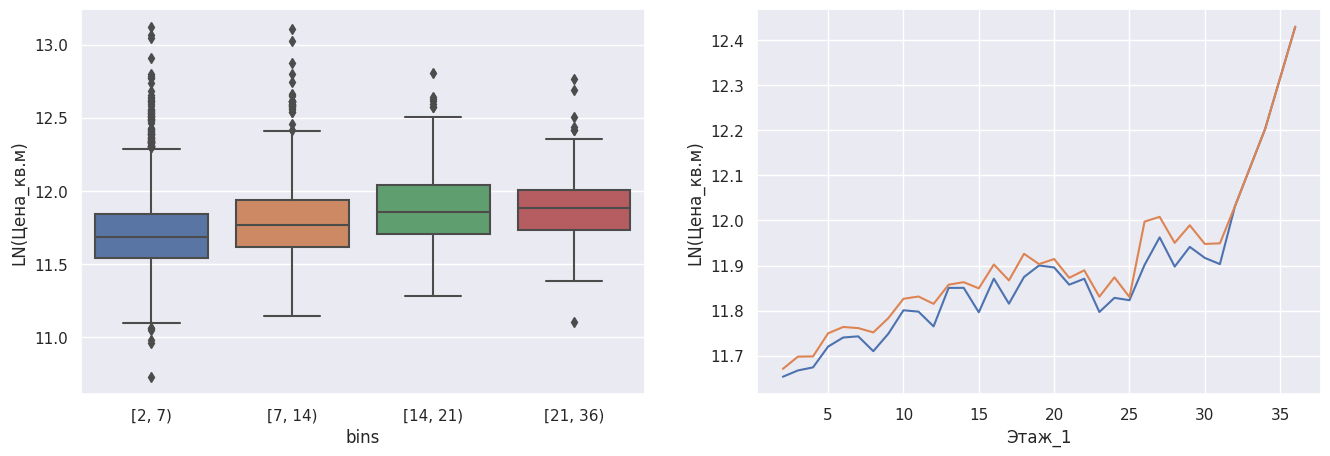

In [57]:
bins, variance_in_bins, average_variance_in_bins = bining_kbd(data = df_1, 
                                                              x = 'Этаж_1', 
                                                              y = 'LN(Цена_кв.м)',
                                                              n_bins = 4
                                                             )

In [58]:
bins.unique()

[[2.0, 7.0), [14.0, 21.0), [7.0, 14.0), [21.0, 36.0), NaN]
Categories (4, interval[int64, left]): [[2, 7) < [7, 14) < [14, 21) < [21, 36)]

In [59]:
variance_in_bins

bins
[2, 7)      0.250246
[7, 14)     0.252113
[14, 21)    0.248595
[21, 36)    0.210371
Name: LN(Цена_кв.м), dtype: float64

In [60]:
average_variance_in_bins

0.24033111346088765